In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from EDA import EDA
from GradientDescent import GradientDescent as GD

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\ZiKa\Desktop\ML\Assignments\New folder\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## load the data in class object

In [4]:
HP = EDA(data=df, target='SalePrice')

## check data types is correct for numeric and categorical

In [5]:
HP.data[HP.grabNumeric()].head()

,OverallCond,GarageCars,OverallQual,BsmtHalfBath,2ndFlrSF,BsmtFinSF1,GarageArea,PoolArea,TotRmsAbvGrd,ScreenPorch,Fireplaces,LowQualFinSF,1stFlrSF,LotFrontage,MoSold,GrLivArea,YrSold,OpenPorchSF,FullBath,HalfBath,SalePrice,WoodDeckSF,BedroomAbvGr,TotalBsmtSF,EnclosedPorch,BsmtFinSF2,3SsnPorch,LotArea,MiscVal,YearBuilt,BsmtFullBath,MasVnrArea,BsmtUnfSF,GarageYrBlt,KitchenAbvGr,MSSubClass,YearRemodAdd
0,5,2,7,0,854,706,548,0,8,0,0,0,856,65.0,2,1710,2008,61,2,1,208500,0,3,856,0,0,0,8450,0,2003,1,196.0,150,2003.0,1,60,2003
1,8,2,6,1,0,978,460,0,6,0,1,0,1262,80.0,5,1262,2007,0,2,0,181500,298,3,1262,0,0,0,9600,0,1976,0,0.0,284,1976.0,1,20,1976
2,5,2,7,0,866,486,608,0,6,0,1,0,920,68.0,9,1786,2008,42,2,1,223500,0,3,920,0,0,0,11250,0,2001,1,162.0,434,2001.0,1,60,2002
3,5,3,7,0,756,216,642,0,7,0,1,0,961,60.0,2,1717,2006,35,1,0,140000,0,3,756,272,0,0,9550,0,1915,1,0.0,540,1998.0,1,70,1970
4,5,3,8,0,1053,655,836,0,9,0,1,0,1145,84.0,12,2198,2008,84,2,1,250000,192,4,1145,0,0,0,14260,0,2000,1,350.0,490,2000.0,1,60,2000


In [6]:
HP.data[HP.grabCategorical()].head()

,MasVnrType,BsmtQual,BsmtFinType2,SaleCondition,Functional,ExterQual,HouseStyle,GarageFinish,Street,SaleType,Neighborhood,GarageType,Fence,ExterCond,BsmtExposure,Heating,LandSlope,PavedDrive,RoofMatl,BsmtFinType1,MSZoning,LotShape,Exterior1st,FireplaceQu,LandContour,Foundation,CentralAir,Alley,HeatingQC,Condition1,KitchenQual,LotConfig,MiscFeature,PoolQC,Condition2,BldgType,Exterior2nd,BsmtCond,Electrical,Utilities,GarageQual,RoofStyle,GarageCond
0,BrkFace,Gd,Unf,Normal,Typ,Gd,2Story,RFn,Pave,WD,CollgCr,Attchd,NaN,TA,No,GasA,Gtl,Y,CompShg,GLQ,RL,Reg,VinylSd,NaN,Lvl,PConc,Y,NaN,Ex,Norm,Gd,Inside,NaN,NaN,Norm,1Fam,VinylSd,TA,SBrkr,AllPub,TA,Gable,TA
1,None,Gd,Unf,Normal,Typ,TA,1Story,RFn,Pave,WD,Veenker,Attchd,NaN,TA,Gd,GasA,Gtl,Y,CompShg,ALQ,RL,Reg,MetalSd,TA,Lvl,CBlock,Y,NaN,Ex,Feedr,TA,FR2,NaN,NaN,Norm,1Fam,MetalSd,TA,SBrkr,AllPub,TA,Gable,TA
2,BrkFace,Gd,Unf,Normal,Typ,Gd,2Story,RFn,Pave,WD,CollgCr,Attchd,NaN,TA,Mn,GasA,Gtl,Y,CompShg,GLQ,RL,IR1,VinylSd,TA,Lvl,PConc,Y,NaN,Ex,Norm,Gd,Inside,NaN,NaN,Norm,1Fam,VinylSd,TA,SBrkr,AllPub,TA,Gable,TA
3,None,TA,Unf,Abnorml,Typ,TA,2Story,Unf,Pave,WD,Crawfor,Detchd,NaN,TA,No,GasA,Gtl,Y,CompShg,ALQ,RL,IR1,Wd Sdng,Gd,Lvl,BrkTil,Y,NaN,Gd,Norm,Gd,Corner,NaN,NaN,Norm,1Fam,Wd Shng,Gd,SBrkr,AllPub,TA,Gable,TA
4,BrkFace,Gd,Unf,Normal,Typ,Gd,2Story,RFn,Pave,WD,NoRidge,Attchd,NaN,TA,Av,GasA,Gtl,Y,CompShg,GLQ,RL,IR1,VinylSd,TA,Lvl,PConc,Y,NaN,Ex,Norm,Gd,FR2,NaN,NaN,Norm,1Fam,VinylSd,TA,SBrkr,AllPub,TA,Gable,TA


## Check for feature correlation

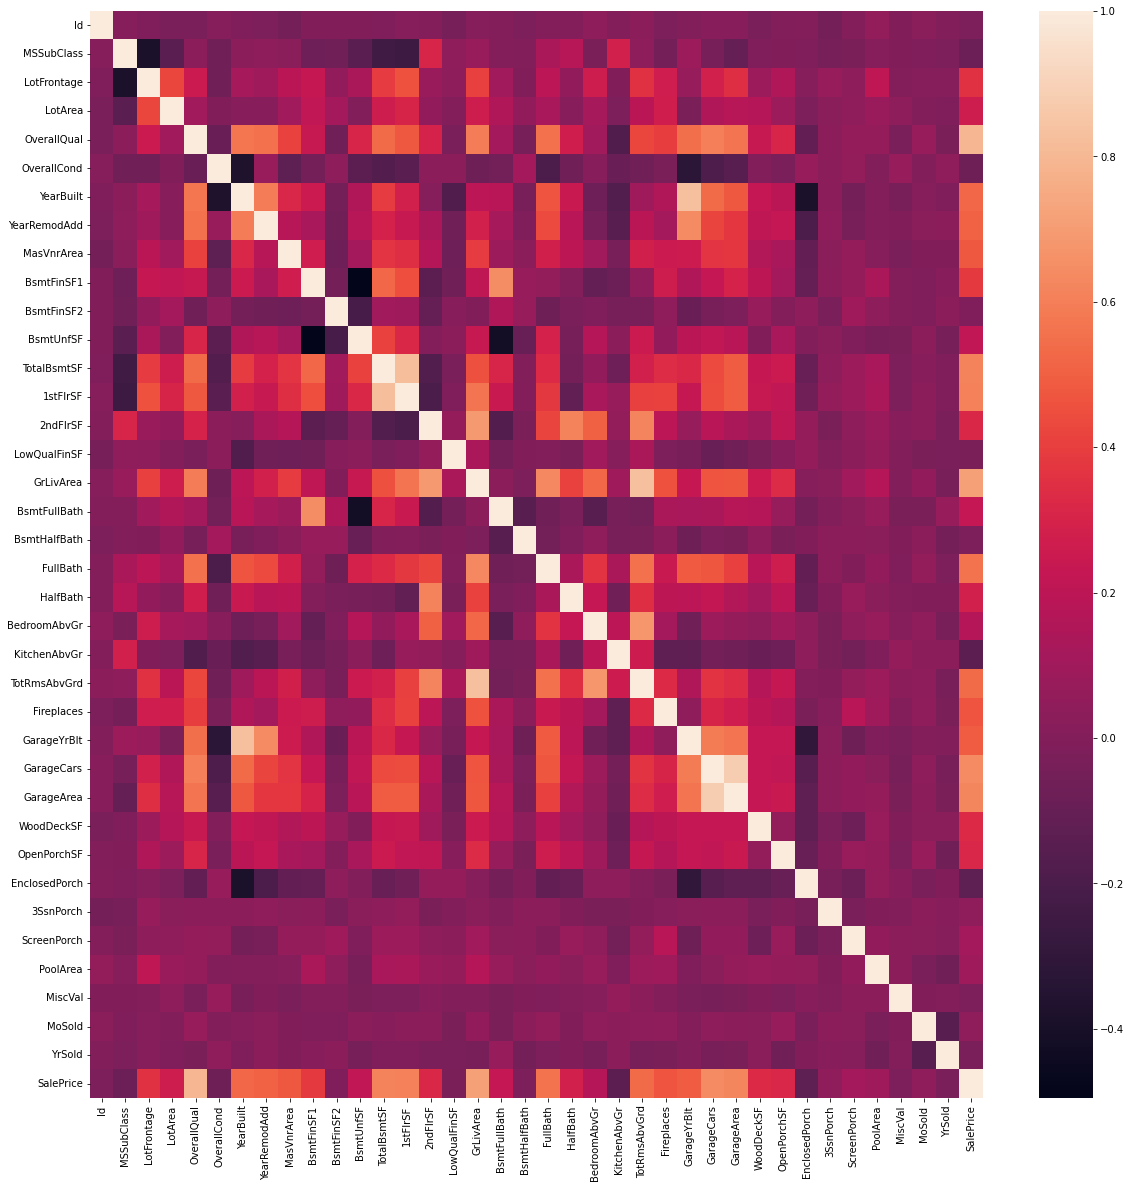

In [7]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot()
sns.heatmap(HP.data.corr(), ax=ax);

In [8]:
dropedFeature, corrResult = HP.handleCorrFeature()

In [9]:
print("Dropped Features:\n", dropedFeature)
print("Correlation Result:\n", corrResult)

Dropped Features:
 ['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']
Correlation Result:
 [{'Feature correlation': 0.8256674841743408, 'Feature YearBuilt vs SalePrice': 0.5228973328794967, 'Feature GarageYrBlt vs SalePrice': 0.4863616774878596}, {'Feature correlation': 0.8195299750050339, 'Feature TotalBsmtSF vs SalePrice': 0.6135805515591943, 'Feature 1stFlrSF vs SalePrice': 0.6058521846919153}, {'Feature correlation': 0.8254893743088425, 'Feature GrLivArea vs SalePrice': 0.7086244776126515, 'Feature TotRmsAbvGrd vs SalePrice': 0.5337231555820284}, {'Feature correlation': 0.882475414281462, 'Feature GarageCars vs SalePrice': 0.6404091972583519, 'Feature GarageArea vs SalePrice': 0.6234314389183622}]


## Clamping outliers

Sale price had outliers in it do we remove outliers from target ?!

In [10]:
outlierdCols = HP.checkOutliers()
for c in outlierdCols:
    print(c)
    print(outlierdCols[c])

MSSubClass
{'Lower Bound': -55.0, 'Below Lower': [], 'Upper Bound': 145.0, 'Above Upper': [9, 48, 56, 75, 87, 93, 115, 125, 145, 165, 172, 180, 193, 195, 225, 227, 232, 235, 243, 246, 285, 291, 300, 312, 335, 344, 348, 363, 411, 430, 432, 434, 472, 488, 489, 490, 500, 504, 520, 535, 578, 599, 603, 614, 623, 635, 637, 649, 655, 675, 685, 687, 703, 705, 713, 755, 758, 829, 831, 837, 861, 914, 915, 956, 959, 962, 969, 971, 975, 985, 1007, 1029, 1030, 1038, 1039, 1062, 1068, 1086, 1088, 1091, 1104, 1144, 1160, 1172, 1186, 1190, 1191, 1219, 1236, 1265, 1266, 1291, 1297, 1304, 1334, 1358, 1364, 1367, 1378, 1393, 1416, 1449, 1452]}
LotFrontage
{'Lower Bound': 27.5, 'Below Lower': [56, 75, 145, 193, 195, 225, 227, 232, 235, 363, 430, 432, 434, 489, 500, 504, 599, 614, 649, 655, 675, 758, 829, 837, 915, 956, 959, 962, 1007, 1029, 1038, 1039, 1088, 1091, 1104, 1160, 1191, 1219, 1291, 1334, 1378, 1449], 'Upper Bound': 111.5, 'Above Upper': [36, 41, 85, 86, 150, 159, 171, 197, 231, 260, 276, 277, 

In [11]:
HP.handleOutliers()

In [12]:
outlierdCols = HP.checkOutliers()
for c in outlierdCols:
    print(outlierdCols[c])

{'Lower Bound': -55.0, 'Below Lower': [], 'Upper Bound': 145.0, 'Above Upper': []}
{'Lower Bound': 27.5, 'Below Lower': [], 'Upper Bound': 111.5, 'Above Upper': []}
{'Lower Bound': 1481.5, 'Below Lower': [], 'Upper Bound': 17673.5, 'Above Upper': []}
{'Lower Bound': 2.0, 'Below Lower': [], 'Upper Bound': 10.0, 'Above Upper': []}
{'Lower Bound': 3.5, 'Below Lower': [], 'Upper Bound': 7.5, 'Above Upper': []}
{'Lower Bound': 1885.0, 'Below Lower': [], 'Upper Bound': 2069.0, 'Above Upper': []}
{'Lower Bound': 1911.5, 'Below Lower': [], 'Upper Bound': 2059.5, 'Above Upper': []}
{'Lower Bound': -249.0, 'Below Lower': [], 'Upper Bound': 415.0, 'Above Upper': []}
{'Lower Bound': -1068.375, 'Below Lower': [], 'Upper Bound': 1780.625, 'Above Upper': []}
{'Lower Bound': 0.0, 'Below Lower': [], 'Upper Bound': 0.0, 'Above Upper': []}
{'Lower Bound': -654.5, 'Below Lower': [], 'Upper Bound': 1685.5, 'Above Upper': []}
{'Lower Bound': 42.0, 'Below Lower': [], 'Upper Bound': 2052.0, 'Above Upper': []}

## handle Null values

In [13]:
null_df = HP.data.isna().sum().reset_index().rename(columns={0: "Null Count"})
null_df[null_df["Null Count"] > 0].sort_values(by="Null Count", ascending=False)

,index,Null Count
68,PoolQC,1453
70,MiscFeature,1406
6,Alley,1369
69,Fence,1179
55,FireplaceQu,690
3,LotFrontage,259
56,GarageType,81
57,GarageFinish,81
59,GarageQual,81
60,GarageCond,81


In [14]:
# null threshold = .6
HP.handleNulls()

In [15]:
null_df = HP.data.isna().sum().reset_index().rename(columns={0: "Null Count"})
null_df[null_df["Null Count"] > 0]

,index,Null Count


## handle redundant col with same value over 80%

In [16]:
HP.handleDuplicates()

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SaleType',
 'SaleCondition']

## check skewness of data

In [17]:
HP.calcSkew()

,Skew Value
WoodDeckSF,1.415478e+04
BedroomAbvGr,-1.595069e-01
TotalBsmtSF,8.135847e+04
MSSubClass,1.423715e+03
YearRemodAdd,-2.317211e+02
OverallCond,5.959538e-01
GarageCars,5.307991e-02
OverallQual,5.521372e-01
LotArea,2.242434e+06
2ndFlrSF,1.457266e+05


In [18]:
HP.handleSkew()

In [19]:
HP.calcSkew()

,Skew Value
WoodDeckSF,0.437877
BedroomAbvGr,-0.159507
TotalBsmtSF,-0.055299
MSSubClass,0.062777
YearRemodAdd,-0.000060
OverallCond,0.595954
GarageCars,0.053080
OverallQual,0.552137
LotArea,-0.279893
2ndFlrSF,2.757691


In [20]:
HP.handleSkew()

In [21]:
HP.calcSkew()

,Skew Value
WoodDeckSF,0.437877
BedroomAbvGr,-0.159507
TotalBsmtSF,-0.055299
MSSubClass,0.062777
YearRemodAdd,-0.000060
OverallCond,0.595954
GarageCars,0.053080
OverallQual,0.552137
LotArea,-0.279893
2ndFlrSF,0.245361


## check distribution and feature scaling

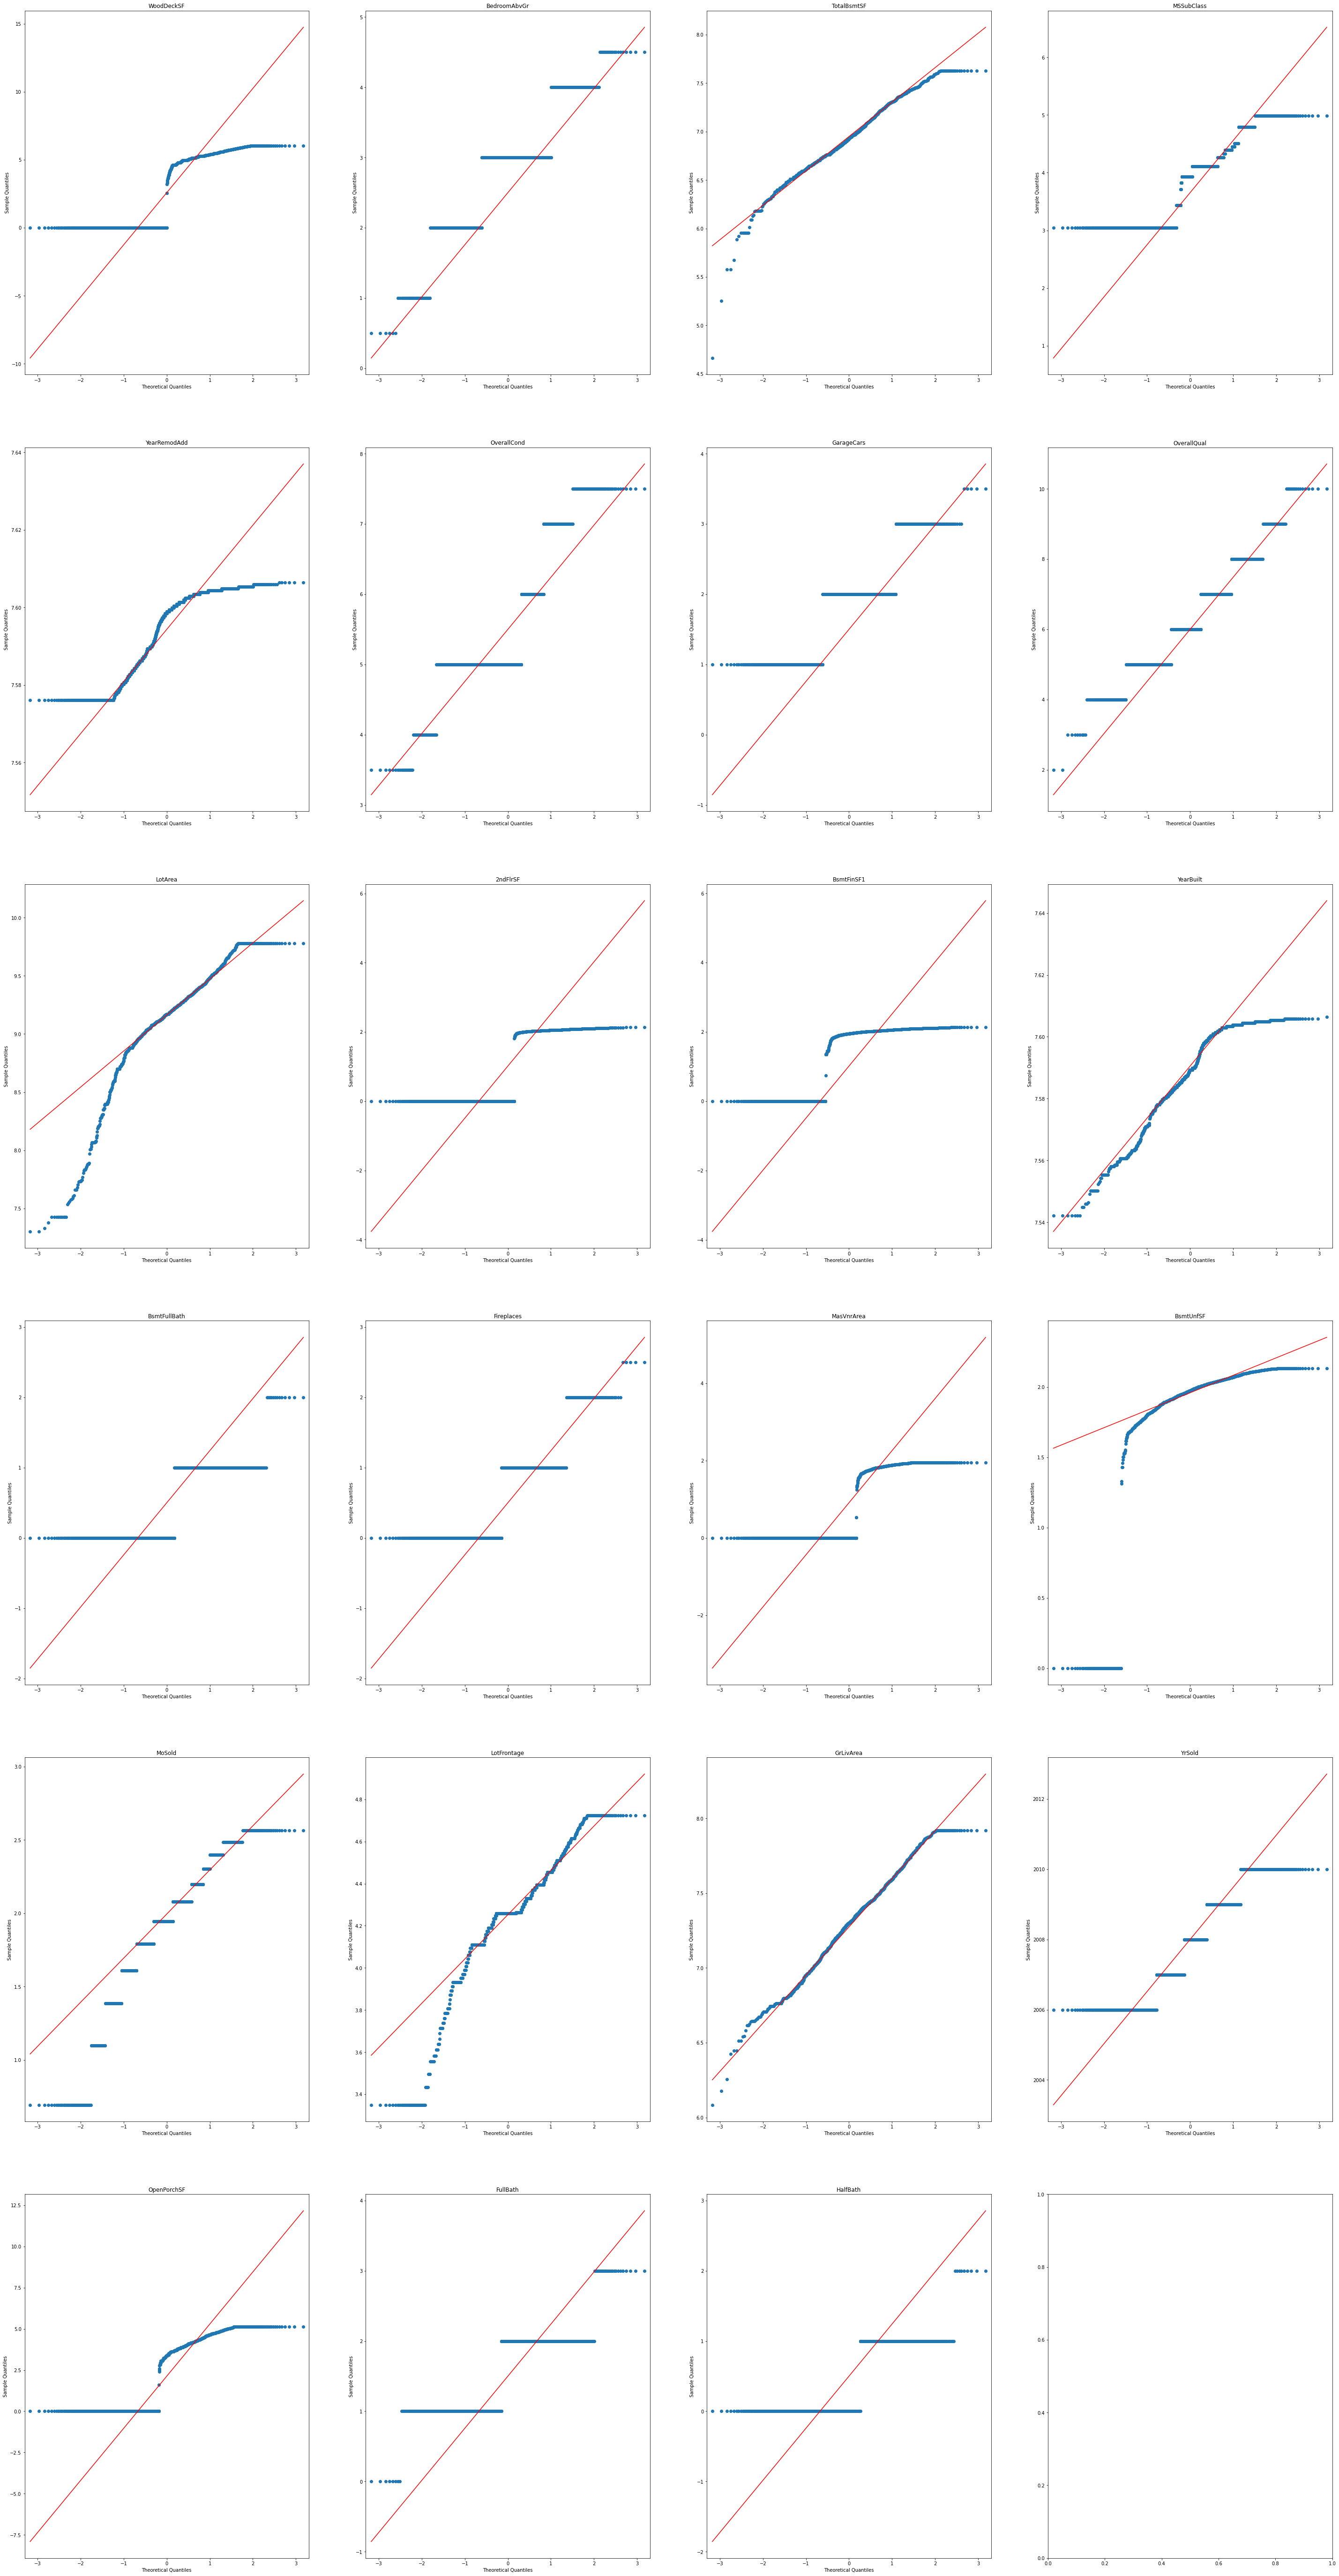

In [22]:
HP.drawQQ()

In [23]:
gaussianFeatures, nonGaussianFeatures = HP.checkDistribution()

W_Statistic=0.716, p=0.00000000
WoodDeckSF does not look Gaussian (reject H0)
W_Statistic=0.841, p=0.00000000
BedroomAbvGr does not look Gaussian (reject H0)
W_Statistic=0.978, p=0.00000000
TotalBsmtSF does not look Gaussian (reject H0)
W_Statistic=0.851, p=0.00000000
MSSubClass does not look Gaussian (reject H0)
W_Statistic=0.861, p=0.00000000
YearRemodAdd does not look Gaussian (reject H0)
W_Statistic=0.801, p=0.00000000
OverallCond does not look Gaussian (reject H0)
W_Statistic=0.783, p=0.00000000
GarageCars does not look Gaussian (reject H0)
W_Statistic=0.941, p=0.00000000
OverallQual does not look Gaussian (reject H0)
W_Statistic=0.896, p=0.00000000
LotArea does not look Gaussian (reject H0)
W_Statistic=0.648, p=0.00000000
2ndFlrSF does not look Gaussian (reject H0)
W_Statistic=0.652, p=0.00000000
BsmtFinSF1 does not look Gaussian (reject H0)
W_Statistic=0.917, p=0.00000000
YearBuilt does not look Gaussian (reject H0)
W_Statistic=0.660, p=0.00000000
BsmtFullBath does not look Gaus

In [24]:
HP.data[nonGaussianFeatures].head()

,WoodDeckSF,BedroomAbvGr,TotalBsmtSF,MSSubClass,YearRemodAdd,OverallCond,GarageCars,OverallQual,LotArea,2ndFlrSF,BsmtFinSF1,YearBuilt,BsmtFullBath,Fireplaces,MasVnrArea,BsmtUnfSF,MoSold,LotFrontage,GrLivArea,YrSold,OpenPorchSF,FullBath,HalfBath,SalePrice
0,0.000000,3.0,6.753438,4.110874,7.602900,5.0,2.0,7,9.042040,2.047835,2.023008,7.602900,1.0,0.0,1.837880,1.794635,1.098612,4.189655,7.444833,2008,4.127134,2,1,12.247699
1,5.700444,3.0,7.141245,3.044522,7.589336,7.5,2.0,6,9.169623,0.000000,2.065156,7.589336,0.0,1.0,0.000000,1.894991,1.791759,4.394449,7.141245,2007,0.000000,2,0,12.109016
2,0.000000,3.0,6.825460,4.110874,7.602401,5.0,2.0,7,9.328212,2.049631,1.972450,7.601902,1.0,1.0,1.807264,1.956616,2.302585,4.234107,7.488294,2008,3.761200,2,1,12.317171
3,0.000000,3.0,6.629363,4.262680,7.586296,5.0,3.0,7,9.164401,2.032004,1.853152,7.557995,1.0,1.0,0.000000,1.986972,1.098612,4.110874,7.448916,2006,3.583519,1,0,11.849405
4,5.262690,4.0,7.044033,4.110874,7.601402,5.0,3.0,8,9.565284,2.074473,2.013056,7.601402,1.0,1.0,1.925822,1.973587,2.564949,4.442651,7.695758,2008,4.442651,2,1,12.429220


In [25]:
HP.featureScale()

W_Statistic=0.716, p=0.00000000
WoodDeckSF does not look Gaussian (reject H0)
W_Statistic=0.841, p=0.00000000
BedroomAbvGr does not look Gaussian (reject H0)
W_Statistic=0.978, p=0.00000000
TotalBsmtSF does not look Gaussian (reject H0)
W_Statistic=0.851, p=0.00000000
MSSubClass does not look Gaussian (reject H0)
W_Statistic=0.861, p=0.00000000
YearRemodAdd does not look Gaussian (reject H0)
W_Statistic=0.801, p=0.00000000
OverallCond does not look Gaussian (reject H0)
W_Statistic=0.783, p=0.00000000
GarageCars does not look Gaussian (reject H0)
W_Statistic=0.941, p=0.00000000
OverallQual does not look Gaussian (reject H0)
W_Statistic=0.896, p=0.00000000
LotArea does not look Gaussian (reject H0)
W_Statistic=0.648, p=0.00000000
2ndFlrSF does not look Gaussian (reject H0)
W_Statistic=0.652, p=0.00000000
BsmtFinSF1 does not look Gaussian (reject H0)
W_Statistic=0.917, p=0.00000000
YearBuilt does not look Gaussian (reject H0)
W_Statistic=0.660, p=0.00000000
BsmtFullBath does not look Gaus

In [26]:
HP.data[nonGaussianFeatures].head()

,WoodDeckSF,BedroomAbvGr,TotalBsmtSF,MSSubClass,YearRemodAdd,OverallCond,GarageCars,OverallQual,LotArea,2ndFlrSF,BsmtFinSF1,YearBuilt,BsmtFullBath,Fireplaces,MasVnrArea,BsmtUnfSF,MoSold,LotFrontage,GrLivArea,YrSold,OpenPorchSF,FullBath,HalfBath,SalePrice
0,0.000000,0.625,0.705219,0.549925,0.884882,0.375,0.4,0.625,0.702292,0.956527,0.946068,0.945664,0.5,0.0,0.942365,0.841822,0.216618,0.611595,0.741586,0.50,0.802685,0.666667,0.5,0.784040
1,0.943371,0.625,0.836075,0.000000,0.437057,1.000,0.4,0.500,0.753770,0.000000,0.965779,0.734291,0.0,0.4,0.000000,0.888897,0.586928,0.760748,0.576085,0.25,0.000000,0.666667,0.0,0.722807
2,0.000000,0.625,0.729521,0.549925,0.868404,0.375,0.4,0.625,0.817759,0.957366,0.922424,0.930105,0.5,0.4,0.926667,0.917804,0.859833,0.643970,0.765279,0.50,0.731514,0.666667,0.5,0.814714
3,0.000000,0.625,0.663353,0.628213,0.336710,0.375,0.8,0.625,0.751663,0.949133,0.866634,0.245918,0.5,0.4,0.000000,0.932043,0.216618,0.554219,0.743812,0.00,0.696957,0.333333,0.0,0.608179
4,0.870927,0.875,0.803273,0.549925,0.835423,0.375,0.8,0.750,0.913414,0.968970,0.941414,0.922320,0.5,0.4,0.987457,0.925765,1.000000,0.795854,0.878378,0.50,0.864049,0.666667,0.5,0.864187


## Categorical data

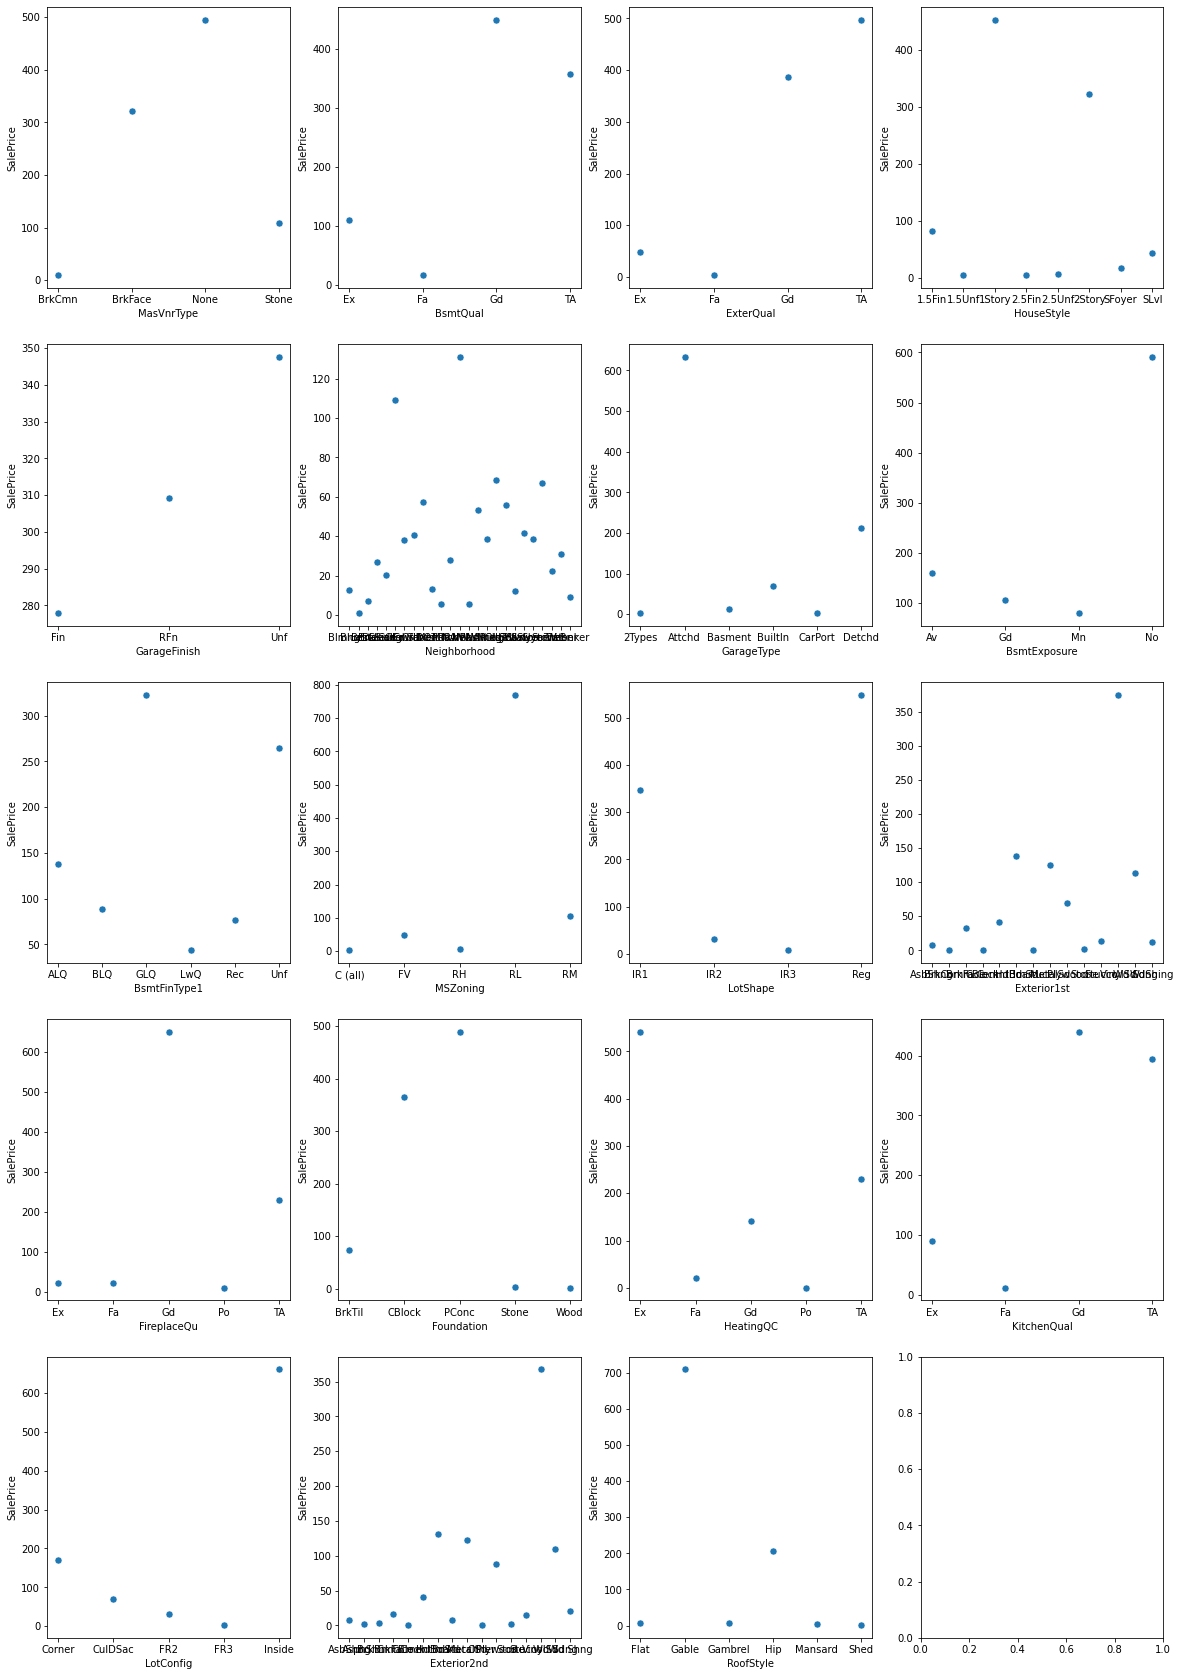

In [27]:
cat = HP.grabCategorical()
nC = 4
nR = len(cat)//4 if len(cat) % 4 == 0 else len(cat)//4 +1
fig, axes = plt.subplots(nrows=nR, ncols=nC, figsize=(20, 30))
i = 0
j = 0
for c in cat:
    p = HP.data.groupby(c)[HP.target].sum()
    sns.scatterplot(x=p.index, y=p, s=50, ax=axes[i, j])
    if j < nC-1:
        j+=1
    else:
        j=0
        i+=1


In [28]:
ordinal = ['ExterQual', 'FireplaceQu', 'LotConfig','BsmtQual','KitchenQual','GarageFinish','BsmtExposure','BsmtFinType1','HeatingQC']
nominal = list(set(cat) - set(ordinal))

In [29]:
ordinalDF = pd.DataFrame()
for c in ordinal:
    LE = LabelEncoder()
    LE.fit(HP.data[c])
    ordinalDF[c] = LE.transform(HP.data[c])

In [30]:
OHE = OneHotEncoder(sparse=False)
OHE.fit(HP.data[nominal])
nDF = OHE.transform(HP.data[nominal])
cols = OHE.categories_
colNames = []
for list_ in cols:
    for element in list_:
        colNames.append(element)
        
nominalDF = pd.DataFrame(nDF, columns=colNames)

In [31]:
numCols = HP.data[HP.grabNumeric()]

In [32]:
numCols.shape

(1338, 24)

In [33]:
final_data = numCols.merge(ordinalDF, how='inner', right_index=True, left_index=True).merge(nominalDF, how='inner', right_index=True, left_index=True)

In [34]:
final_data.head()

,WoodDeckSF,BedroomAbvGr,TotalBsmtSF,MSSubClass,YearRemodAdd,OverallCond,GarageCars,OverallQual,LotArea,2ndFlrSF,BsmtFinSF1,YearBuilt,BsmtFullBath,Fireplaces,MasVnrArea,BsmtUnfSF,MoSold,LotFrontage,GrLivArea,YrSold,OpenPorchSF,FullBath,HalfBath,SalePrice,ExterQual,FireplaceQu,LotConfig,BsmtQual,KitchenQual,GarageFinish,BsmtExposure,BsmtFinType1,HeatingQC,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,BrkCmn,BrkFace,None,Stone,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,C (all),FV,RH,RL,RM,IR1,IR2,IR3,Reg,AsbShng,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,BrkTil,CBlock,PConc,Stone,Wood,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Flat,Gable,Gambrel,Hip,Mansard,Shed
0,0.000000,0.625,0.705219,0.549925,0.884882,0.375,0.4,0.625,0.702292,0.956527,0.946068,0.945664,0.5,0.0,0.942365,0.841822,0.216618,0.611595,0.741586,0.50,0.802685,0.666667,0.5,0.784040,2,2,4,2,2,1,3,2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.943371,0.625,0.836075,0.000000,0.437057,1.000,0.4,0.500,0.753770,0.000000,0.965779,0.734291,0.0,0.4,0.000000,0.888897,0.586928,0.760748,0.576085,0.25,0.000000,0.666667,0.0,0.722807,3,4,2,2,3,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.000000,0.625,0.729521,0.549925,0.868404,0.375,0.4,0.625,0.817759,0.957366,0.922424,0.930105,0.5,0.4,0.926667,0.917804,0.859833,0.643970,0.765279,0.50,0.731514,0.666667,0.5,0.814714,2,4,4,2,2,1,2,2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000000,0.625,0.663353,0.628213,0.336710,0.375,0.8,0.625,0.751663,0.949133,0.866634,0.245918,0.5,0.4,0.000000,0.932043,0.216618,0.554219,0.743812,0.00,0.696957,0.333333,0.0,0.608179,3,2,0,3,2,2,3,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.870927,0.875,0.803273,0.549925,0.835423,0.375,0.8,0.750,0.913414,0.968970,0.941414,0.922320,0.5,0.4,0.987457,0.925765,1.000000,0.795854,0.878378,0.50,0.864049,0.666667,0.5,0.864187,2,4,2,2,2,1,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
data_y = final_data[['SalePrice']]
data_x = final_data[list(set(final_data.columns) - set(['SalePrice']))]

In [36]:
xTrain, xTest, yTrain, yTest = train_test_split(data_x, data_y, test_size=.15, random_state=42)

In [37]:
SGD = SGDRegressor()
SGD.fit(xTrain, yTrain)
print("Train Score is: ", SGD.score(xTrain, yTrain.values.ravel()))
print("Test Score is: ", SGD.score(xTest, yTest.values.ravel()))

Train Score is:  0.8109746218608858
Test Score is:  0.7733305049371538


c:\users\zika\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
SGD.n_iter_

7

In [39]:
D = np.c_[xTrain, yTrain]

#### Note
- i didn't use .0001 learning rate because i am not using schedule train for alpha as used in SGDRegressor module
- if i use .0001 my model doesn't converge

In [40]:
gd = GD(data=D, alpha=.001)

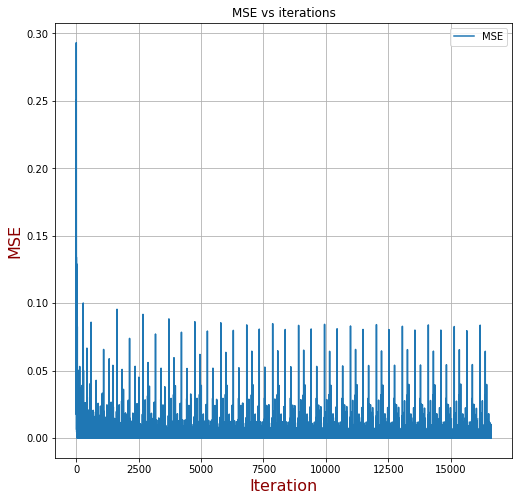

r2_score:  0.8173996614411818
Optimizer:  ADAM
Batch size:  1
Total number of iterations:  16624
alpha:  0.001
gamma: 0.9 | beta1: 0.9 | beta2: 0.999
Optimal thetas values:
 [[-0.01362332]
 [-0.00477471]
 [ 0.04906708]
 [ 0.09910782]
 [-0.0836925 ]
 [-0.01407051]
 [-0.00769206]
 [-0.04845483]
 [ 0.28418207]
 [-0.07926155]
 [ 0.05187128]
 [-0.013423  ]
 [ 0.02079089]
 [ 0.04048592]
 [ 0.03641499]
 [-0.00452284]
 [-0.0360464 ]
 [-0.00114085]
 [ 0.00926357]
 [ 0.05466094]
 [ 0.03587647]
 [-0.01287179]
 [-0.03330072]
 [-0.00770576]
 [-0.07109964]
 [-0.01393257]
 [ 0.0167723 ]
 [-0.00741679]
 [-0.04956908]
 [-0.04956908]
 [-0.01312626]
 [-0.0069869 ]
 [ 0.00881601]
 [ 0.00451856]
 [ 0.01426681]
 [-0.0629246 ]
 [ 0.04831214]
 [-0.02817839]
 [ 0.01670464]
 [ 0.00109961]
 [-0.00329144]
 [-0.00029235]
 [ 0.16304853]
 [ 0.03251618]
 [-0.01989649]
 [-0.01267985]
 [-0.01289027]
 [-0.00624135]
 [-0.00939762]
 [ 0.01498396]
 [-0.01717962]
 [-0.00290989]
 [ 0.02044622]
 [ 0.04750092]
 [ 0.08070585]
 

In [41]:
gd.BatchGD(size=1, epochs=50, opt="ADAM")

## Closed form solution
- Note i use the code you provided us in the lab. Thanks ^_^

In [42]:
theta = gd.linear_reg_SVD()

In [43]:
y_hat_from_scratch = xTrain.values.dot(theta)

In [44]:
y_hat_from_scratch

array([[0.74360345],
       [0.53799658],
       [0.63849395],
       ...,
       [0.68010005],
       [0.77489612],
       [0.80796957]])

In [45]:
LR = LinearRegression()
LR.fit(xTrain, yTrain)

LinearRegression()

In [46]:
y_hat_sklearn = LR.predict(xTrain)
y_hat_sklearn

array([[0.74639893],
       [0.53857422],
       [0.63879395],
       ...,
       [0.68182373],
       [0.77642822],
       [0.80871582]])

## Closed form including intercept

In [47]:
theta2 = gd.linear_reg_SVD(with_ones=True)

In [48]:
ones = np.ones((xTrain.shape[0], 1))
D = np.c_[ones, xTrain]

In [49]:
y_hat_from_scratch = D.dot(theta2)
y_hat_from_scratch

array([[0.74295748],
       [0.53496134],
       [0.6386146 ],
       ...,
       [0.68219534],
       [0.77551619],
       [0.81033897]])

In [50]:
LR = LinearRegression()
LR.fit(xTrain, yTrain)

LinearRegression()

In [51]:
y_hat_sklearn = LR.predict(xTrain)
y_hat_sklearn

array([[0.74639893],
       [0.53857422],
       [0.63879395],
       ...,
       [0.68182373],
       [0.77642822],
       [0.80871582]])